In [1]:
%config Completer.use_jedi = False

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:
df = pd.read_csv('dataset.csv')
df

,Unnamed: 0,dog_id,dog_height,dog_weight,dog_hair_dencity,dog_hair_len,month,daily_stress,daily_weather,daily_horoscope,hair_lost
0,0,0,0.70,25,0.393448,0.1,1,0.621256,0.13,0.01,0.199802
1,1,1,0.98,19,0.497545,0.4,1,0.621256,0.13,0.01,5.048685
2,2,2,0.65,24,0.552044,0.2,1,0.621256,0.13,0.01,2.575175
3,3,3,0.65,21,0.267317,0.6,1,0.621256,0.13,0.01,2.154189
4,4,4,0.84,11,0.659456,0.5,1,0.621256,0.13,0.01,2.536958
...,...,...,...,...,...,...,...,...,...,...,...
149995,149995,15,0.88,14,0.301906,0.9,7,0.286894,0.25,0.02,1.057560
149996,149996,16,0.83,11,0.077273,0.3,7,0.286894,0.25,0.02,0.758664
149997,149997,17,0.62,11,0.342119,0.4,7,0.286894,0.25,0.02,0.820447
149998,149998,18,0.92,19,0.352871,0.1,7,0.286894,0.25,0.02,2.067663


In [4]:
# poping unwanted index collum
df.pop('Unnamed: 0')

0              0
1              1
2              2
3              3
4              4
           ...  
149995    149995
149996    149996
149997    149997
149998    149998
149999    149999
Name: Unnamed: 0, Length: 150000, dtype: int64

In [5]:
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers
from tensorflow import keras


In [6]:
train_dataset = df.sample(frac=0.8, random_state=42)
test_dataset = df.drop(train_dataset.index)

In [7]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('hair_lost')
test_labels = test_features.pop('hair_lost')

In [8]:
# this normalizer probably be shared amongst the models so less video mem consumption? (my poor little 6 gig card) 
# don't quote me on this
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))


# Testing linear regression analogy
MSE should be around 2

In [9]:
model = keras.Sequential(normalizer)
model.add(layers.Dense(units=1))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse')

history = model.fit(
    train_features, train_labels,
    epochs=10,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/10
3000/3000 [==============================] - 5s 2ms/step - loss: 6.0661 - val_loss: 2.1292
Epoch 2/10
3000/3000 [==============================] - 4s 1ms/step - loss: 2.0360 - val_loss: 2.0128
Epoch 3/10
3000/3000 [==============================] - 4s 1ms/step - loss: 1.9979 - val_loss: 2.0117
Epoch 4/10
3000/3000 [==============================] - 4s 1ms/step - loss: 2.0001 - val_loss: 2.0108
Epoch 5/10
3000/3000 [==============================] - 4s 1ms/step - loss: 2.0115 - val_loss: 2.0104
Epoch 6/10
3000/3000 [==============================] - 4s 1ms/step - loss: 1.9980 - val_loss: 2.0127
Epoch 7/10
3000/3000 [==============================] - 4s 1ms/step - loss: 2.0207 - val_loss: 2.0110
Epoch 8/10
3000/3000 [==============================] - 4s 1ms/step - loss: 1.9955 - val_loss: 2.0117
Epoch 9/10
3000/3000 [==============================] - 4s 1ms/step - loss: 1.9962 - val_loss: 2.0123
Epoch 10/10
3000/3000 [==============================] - 4s 1ms/step - loss: 2.009

# Now we create a function that takes care of the full model lifecycle

In [10]:
def model_lifecycle(model_size,
                    Optimizer,
                    learning_rate, **kwargs):
    
    model = keras.Sequential(kwargs['normalizer'])
    
    for i in range(model_size-1):
        model.add(layers.Dense(units=kwargs['layer_units'], activation='sigmoid'))
    
    model.add(layers.Dense(units=1, activation='relu'))
    
    model.compile(optimizer=Optimizer(learning_rate=0.01), 
                  loss='mse')

    X_train, X_test = kwargs['train_features'], kwargs['test_features']
    y_train, y_test = kwargs['train_labels'], kwargs['test_labels']

    history = model.fit(
        X_train, y_train,
        epochs=kwargs['epochs'],
        validation_split=kwargs['validation_split'],
        verbose=kwargs['verbose'],
    )
    return history


In [33]:
# creating dict with combined keys
optimizers = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adam]
testing_results = {}
for model_size in [1, 5, 25]:
    for optimizer in optimizers:
        for learning_rate in [0.1, 0.01, 0.001]:
            key = (model_size, optimizer, learning_rate)
            testing_results[key] = None
   

In [34]:
for key, value in testing_results.items():
    print(f'model size = {key[0]:2} | optimizer = {key[1].__name__:7} | learning_rate = {key[2]:5} | ', end='')
    print('Empty' if value is None else '')


model size =  1 | optimizer = SGD     | learning_rate =   0.1 | Empty
model size =  1 | optimizer = SGD     | learning_rate =  0.01 | Empty
model size =  1 | optimizer = SGD     | learning_rate = 0.001 | Empty
model size =  1 | optimizer = RMSprop | learning_rate =   0.1 | Empty
model size =  1 | optimizer = RMSprop | learning_rate =  0.01 | Empty
model size =  1 | optimizer = RMSprop | learning_rate = 0.001 | Empty
model size =  1 | optimizer = Adam    | learning_rate =   0.1 | Empty
model size =  1 | optimizer = Adam    | learning_rate =  0.01 | Empty
model size =  1 | optimizer = Adam    | learning_rate = 0.001 | Empty
model size =  5 | optimizer = SGD     | learning_rate =   0.1 | Empty
model size =  5 | optimizer = SGD     | learning_rate =  0.01 | Empty
model size =  5 | optimizer = SGD     | learning_rate = 0.001 | Empty
model size =  5 | optimizer = RMSprop | learning_rate =   0.1 | Empty
model size =  5 | optimizer = RMSprop | learning_rate =  0.01 | Empty
model size =  5 | op

In [35]:
parameters = {
    'normalizer': normalizer,
    'layer_units': 64,
    'epochs': 20,
    'validation_split': 0.2,
    'verbose': 1,
    'train_features': train_features,
    'test_features': test_features,
    'train_labels': train_labels,
    'test_labels': test_labels
}

In [36]:
# marking result for re-training
_size = 25
_opt = keras.optimizers.RMSprop
_learn_rate = 0.001
key_for_erasing = (_size, _opt, _learn_rate)
# if input(f'Are you shure you want to erase training and history for \n {key_for_erasing}?\n >>> ') == 'yes':
#     testing_results[key_for_erasing] = None
#     print('Erased')
    

In [37]:
%%time
for key in testing_results:
    keras.backend.clear_session()
    if testing_results[key] is not None:
        continue
    print(f'model size: {key[0]:2} | optimizer: {key[1].__name__:7} | learning_rate: {key[2]:5} | ', end='')
    result = model_lifecycle(*key, **parameters)
    loss = result.history['loss'][-1]
    val_loss = result.history['val_loss'][-1]
    print(f'MSE {loss:7.5f} | val MSE {val_loss:7.5f}')
    testing_results[key] = result
    keras.backend.clear_session()

model size:  1 | optimizer: SGD     | learning_rate:   0.1 | Epoch 1/20
3000/3000 [==============================] - 4s 1ms/step - loss: 2.6904 - val_loss: 2.0150
Epoch 2/20
3000/3000 [==============================] - 4s 1ms/step - loss: 2.0119 - val_loss: 2.0150
Epoch 3/20
3000/3000 [==============================] - 4s 1ms/step - loss: 2.0182 - val_loss: 2.0120
Epoch 4/20
3000/3000 [==============================] - 4s 1ms/step - loss: 2.0025 - val_loss: 2.0189
Epoch 5/20
3000/3000 [==============================] - 4s 1ms/step - loss: 1.9854 - val_loss: 2.0182
Epoch 6/20
3000/3000 [==============================] - 4s 1ms/step - loss: 2.0103 - val_loss: 2.0106
Epoch 7/20
3000/3000 [==============================] - 4s 1ms/step - loss: 2.0136 - val_loss: 2.0190
Epoch 8/20
3000/3000 [==============================] - 4s 1ms/step - loss: 1.9942 - val_loss: 2.0183
Epoch 9/20
3000/3000 [==============================] - 4s 1ms/step - loss: 2.0208 - val_loss: 2.0201
Epoch 10/20
3000/3000

3000/3000 [==============================] - 5s 2ms/step - loss: 2.0236 - val_loss: 2.0387
Epoch 18/20
3000/3000 [==============================] - 5s 2ms/step - loss: 2.0022 - val_loss: 2.0168
Epoch 19/20
3000/3000 [==============================] - 5s 2ms/step - loss: 2.0047 - val_loss: 2.0186
Epoch 20/20
3000/3000 [==============================] - 5s 2ms/step - loss: 2.0182 - val_loss: 2.0500
MSE 2.01620 | val MSE 2.04997
model size:  1 | optimizer: RMSprop | learning_rate:  0.01 | Epoch 1/20
3000/3000 [==============================] - 5s 2ms/step - loss: 2.7881 - val_loss: 2.0154
Epoch 2/20
3000/3000 [==============================] - 5s 2ms/step - loss: 2.0141 - val_loss: 2.0510
Epoch 3/20
3000/3000 [==============================] - 5s 2ms/step - loss: 2.0156 - val_loss: 2.0168
Epoch 4/20
3000/3000 [==============================] - 5s 2ms/step - loss: 2.0126 - val_loss: 2.0182
Epoch 5/20
3000/3000 [==============================] - 5s 2ms/step - loss: 2.0119 - val_loss: 2.0231

3000/3000 [==============================] - 4s 1ms/step - loss: 2.2270 - val_loss: 2.2377
Epoch 14/20
3000/3000 [==============================] - 4s 1ms/step - loss: 2.2169 - val_loss: 2.2306
Epoch 15/20
3000/3000 [==============================] - 4s 1ms/step - loss: 2.2074 - val_loss: 2.2343
Epoch 16/20
3000/3000 [==============================] - 4s 1ms/step - loss: 2.2066 - val_loss: 2.2453
Epoch 17/20
3000/3000 [==============================] - 4s 1ms/step - loss: 2.2072 - val_loss: 2.2389
Epoch 18/20
3000/3000 [==============================] - 4s 1ms/step - loss: 2.2272 - val_loss: 2.2327
Epoch 19/20
3000/3000 [==============================] - 4s 1ms/step - loss: 2.2133 - val_loss: 2.2375
Epoch 20/20
3000/3000 [==============================] - 4s 1ms/step - loss: 2.2200 - val_loss: 2.2358
MSE 2.21679 | val MSE 2.23581
model size:  1 | optimizer: Adam    | learning_rate: 0.001 | Epoch 1/20
3000/3000 [==============================] - 4s 1ms/step - loss: 2.8071 - val_loss: 2.

3000/3000 [==============================] - 7s 2ms/step - loss: 0.1527 - val_loss: 0.1367
Epoch 10/20
3000/3000 [==============================] - 7s 2ms/step - loss: 0.1450 - val_loss: 0.1274
Epoch 11/20
3000/3000 [==============================] - 7s 2ms/step - loss: 0.1339 - val_loss: 0.1139
Epoch 12/20
3000/3000 [==============================] - 7s 2ms/step - loss: 0.1224 - val_loss: 0.1111
Epoch 13/20
3000/3000 [==============================] - 7s 2ms/step - loss: 0.1145 - val_loss: 0.1149
Epoch 14/20
3000/3000 [==============================] - 7s 2ms/step - loss: 0.1076 - val_loss: 0.0945
Epoch 15/20
3000/3000 [==============================] - 7s 2ms/step - loss: 0.0986 - val_loss: 0.1203
Epoch 16/20
3000/3000 [==============================] - 7s 2ms/step - loss: 0.0927 - val_loss: 0.0828
Epoch 17/20
3000/3000 [==============================] - 7s 2ms/step - loss: 0.0845 - val_loss: 0.0831
Epoch 18/20
3000/3000 [==============================] - 7s 2ms/step - loss: 0.0795 -

Epoch 5/20
3000/3000 [==============================] - 7s 2ms/step - loss: 9.8211 - val_loss: 9.8611
Epoch 6/20
3000/3000 [==============================] - 7s 2ms/step - loss: 9.7992 - val_loss: 9.8611
Epoch 7/20
3000/3000 [==============================] - 7s 2ms/step - loss: 9.7785 - val_loss: 9.8611
Epoch 8/20
3000/3000 [==============================] - 7s 2ms/step - loss: 9.8679 - val_loss: 9.8611
Epoch 9/20
3000/3000 [==============================] - 7s 2ms/step - loss: 9.8379 - val_loss: 9.8611
Epoch 10/20
3000/3000 [==============================] - 7s 2ms/step - loss: 9.8989 - val_loss: 9.8611
Epoch 11/20
3000/3000 [==============================] - 7s 2ms/step - loss: 9.8571 - val_loss: 9.8611
Epoch 12/20
3000/3000 [==============================] - 7s 2ms/step - loss: 9.8236 - val_loss: 9.8611
Epoch 13/20
3000/3000 [==============================] - 7s 2ms/step - loss: 9.8311 - val_loss: 9.8611
Epoch 14/20
3000/3000 [==============================] - 7s 2ms/step - loss: 9

3000/3000 [==============================] - 23s 8ms/step - loss: 9.8461 - val_loss: 9.8611
MSE 9.85623 | val MSE 9.86113
model size: 25 | optimizer: SGD     | learning_rate:  0.01 | Epoch 1/20
3000/3000 [==============================] - 24s 8ms/step - loss: 9.8053 - val_loss: 9.8611
Epoch 2/20
3000/3000 [==============================] - 23s 8ms/step - loss: 9.8207 - val_loss: 9.8611
Epoch 3/20
3000/3000 [==============================] - 23s 8ms/step - loss: 9.9077 - val_loss: 9.8611
Epoch 4/20
3000/3000 [==============================] - 23s 8ms/step - loss: 9.8613 - val_loss: 9.8611
Epoch 5/20
3000/3000 [==============================] - 23s 8ms/step - loss: 9.8354 - val_loss: 9.8611
Epoch 6/20
3000/3000 [==============================] - 23s 8ms/step - loss: 9.8779 - val_loss: 9.8611
Epoch 7/20
3000/3000 [==============================] - 23s 8ms/step - loss: 9.8282 - val_loss: 9.8611
Epoch 8/20
3000/3000 [==============================] - 23s 8ms/step - loss: 9.8302 - val_loss: 

3000/3000 [==============================] - 58s 19ms/step - loss: 9.8565 - val_loss: 9.8611
Epoch 16/20
3000/3000 [==============================] - 58s 19ms/step - loss: 9.8525 - val_loss: 9.8611
Epoch 17/20
3000/3000 [==============================] - 59s 20ms/step - loss: 9.9178 - val_loss: 9.8611
Epoch 18/20
3000/3000 [==============================] - 59s 20ms/step - loss: 9.8724 - val_loss: 9.8611
Epoch 19/20
3000/3000 [==============================] - 57s 19ms/step - loss: 9.8726 - val_loss: 9.8611
Epoch 20/20
3000/3000 [==============================] - 62s 21ms/step - loss: 9.8644 - val_loss: 9.8611
MSE 9.85623 | val MSE 9.86113
model size: 25 | optimizer: RMSprop | learning_rate: 0.001 | Epoch 1/20
3000/3000 [==============================] - 63s 21ms/step - loss: 9.8675 - val_loss: 9.8611
Epoch 2/20
3000/3000 [==============================] - 61s 20ms/step - loss: 9.8915 - val_loss: 9.8611
Epoch 3/20
3000/3000 [==============================] - 59s 20ms/step - loss: 9.858

3000/3000 [==============================] - 26s 9ms/step - loss: 4.0378 - val_loss: 4.0987
Epoch 11/20
3000/3000 [==============================] - 26s 9ms/step - loss: 4.0348 - val_loss: 4.0859
Epoch 12/20
3000/3000 [==============================] - 26s 9ms/step - loss: 4.0327 - val_loss: 4.0877
Epoch 13/20
3000/3000 [==============================] - 26s 9ms/step - loss: 4.0155 - val_loss: 4.0861
Epoch 14/20
3000/3000 [==============================] - 26s 9ms/step - loss: 4.0104 - val_loss: 4.0956
Epoch 15/20
3000/3000 [==============================] - 26s 9ms/step - loss: 4.0269 - val_loss: 4.0879
Epoch 16/20
3000/3000 [==============================] - 26s 9ms/step - loss: 4.0473 - val_loss: 4.0861
Epoch 17/20
3000/3000 [==============================] - 26s 9ms/step - loss: 4.0497 - val_loss: 4.0931
Epoch 18/20
3000/3000 [==============================] - 26s 9ms/step - loss: 4.0231 - val_loss: 4.0859
Epoch 19/20
3000/3000 [==============================] - 26s 9ms/step - loss

# Plotting results

The way I want to plot: 9 plots for every of 9 parameters (3 models, 3 optimizers, 3 learning rates). I will combine these 9 plots into one big plot, so 81 subplots or 9 big plots in total.

In [38]:
def select(from_, where_, reversed_=False):
    result = {}
    for key, item in from_.items():
        if where_ in key:
            new_key = [value for value in key if value != where_]
            if reversed_:
                new_key = reversed(new_key)
            result[tuple(new_key)] = item
    return result

In [39]:
def get_title(value):
    if isinstance(value, int):
        return f'Model depth: {value}'
    elif isinstance(value, float):
        return f'Learning rate: {value}'
    else:
        return f'Optimizer: {value.__name__}'

In [40]:
def plot(data, value, 
         flip=False,
         show_first_n=None, 
         y_zoom=None):
    
    data = select(data, value, reversed_=flip)
    
    scaler = 5
    fig, axes = plt.subplots(nrows=3, ncols=3,
#                              sharex=True, sharey=True,
                             figsize=(3*scaler,2*scaler))
    
    plt.setp(axes.flat, xlabel='epoch', ylabel='loss')
    plt.suptitle(get_title(value), fontsize=20)


    for index, (key, value) in enumerate(data.items()):
        if value is None:
            continue
        h, w = index // 3, index % 3

        ax = axes[h][w]
        ax.plot(value.history['loss'], label='loss')
        ax.plot(value.history['val_loss'], label='val loss')
        
        if h == 0:
            title = get_title(key[1])
            ax.set_title(title)
        
        if w == 0:
            title = get_title(key[0])
            ax.annotate(title, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')
        ax.legend()

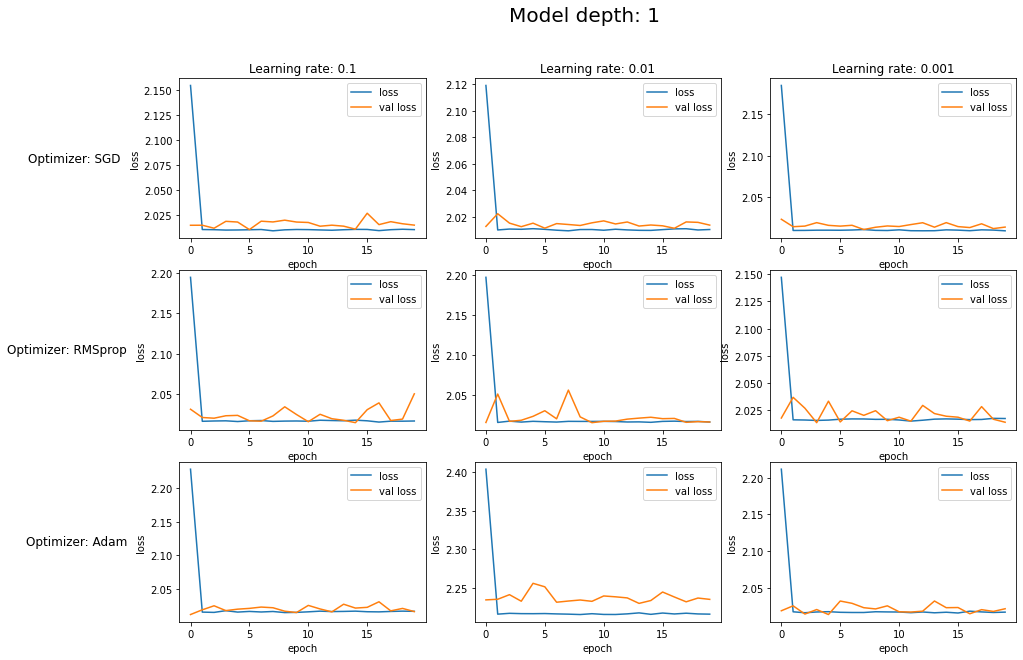

In [42]:
plot(testing_results, 1)


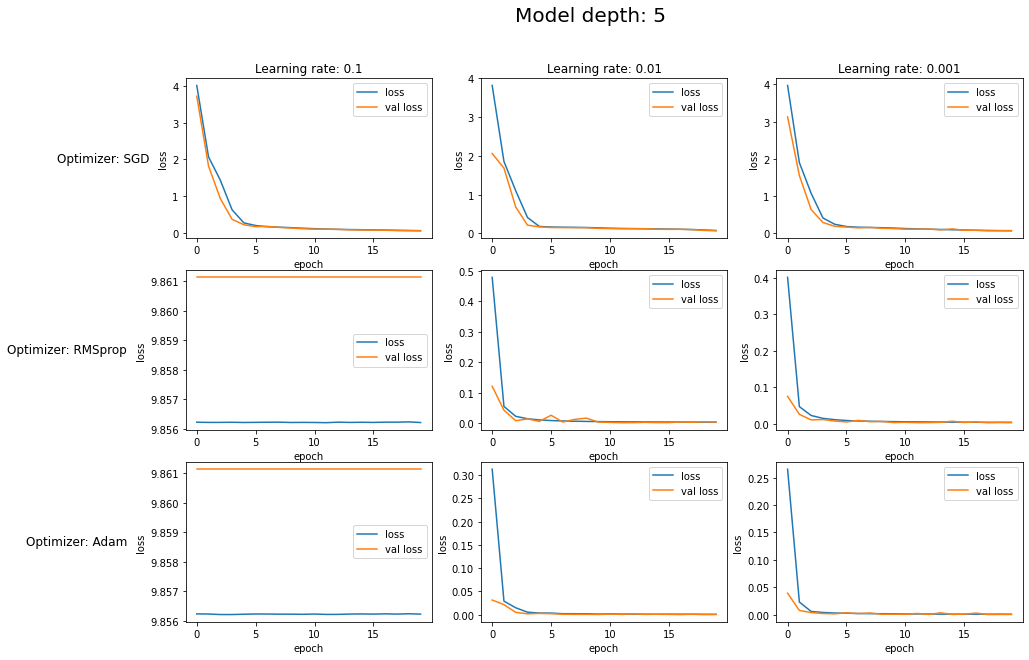

In [43]:
plot(testing_results, 5)

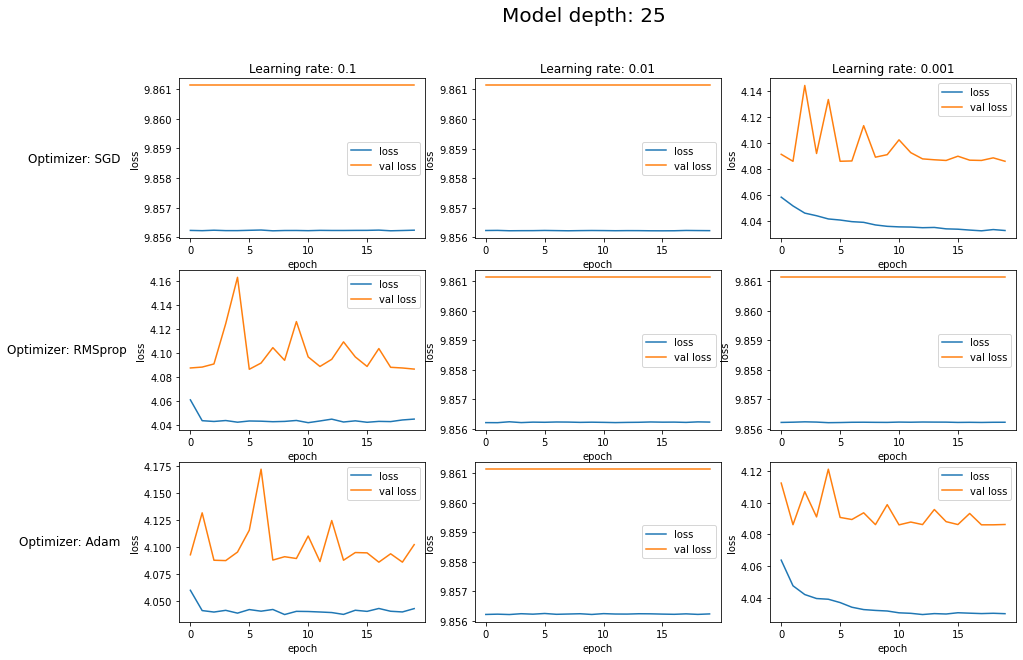

In [44]:
plot(testing_results, 25)

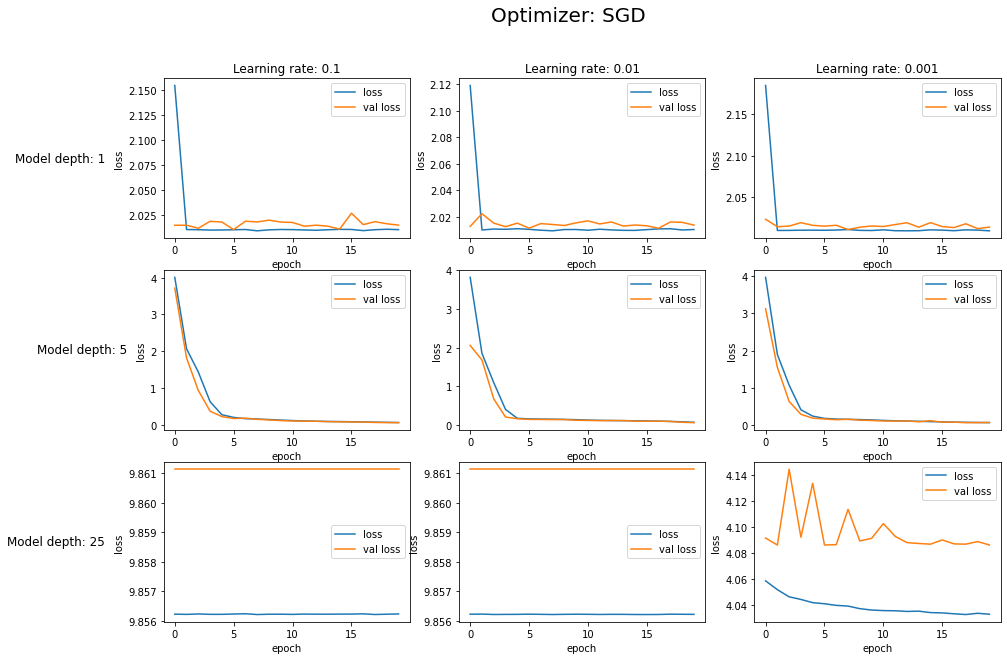

In [45]:
plot(testing_results, optimizers[0])

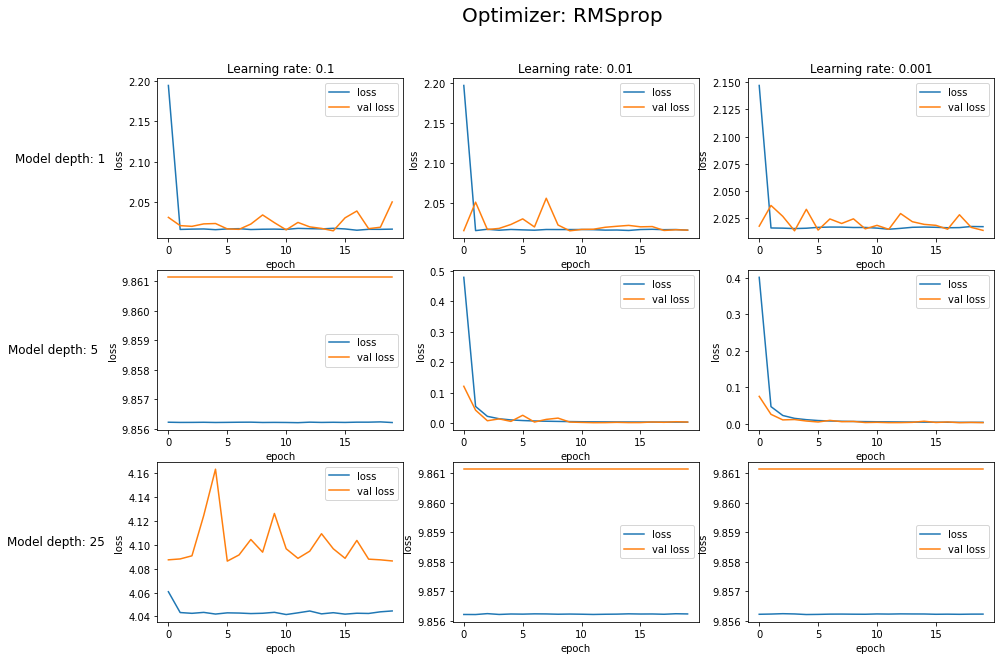

In [46]:
plot(testing_results, optimizers[1])

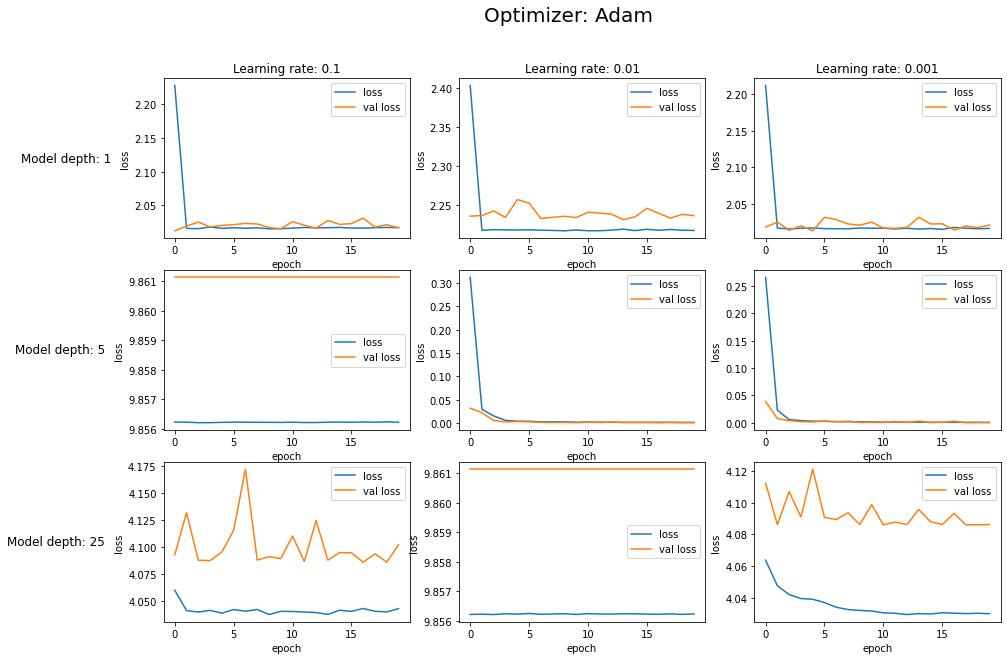

In [47]:
plot(testing_results, optimizers[2])

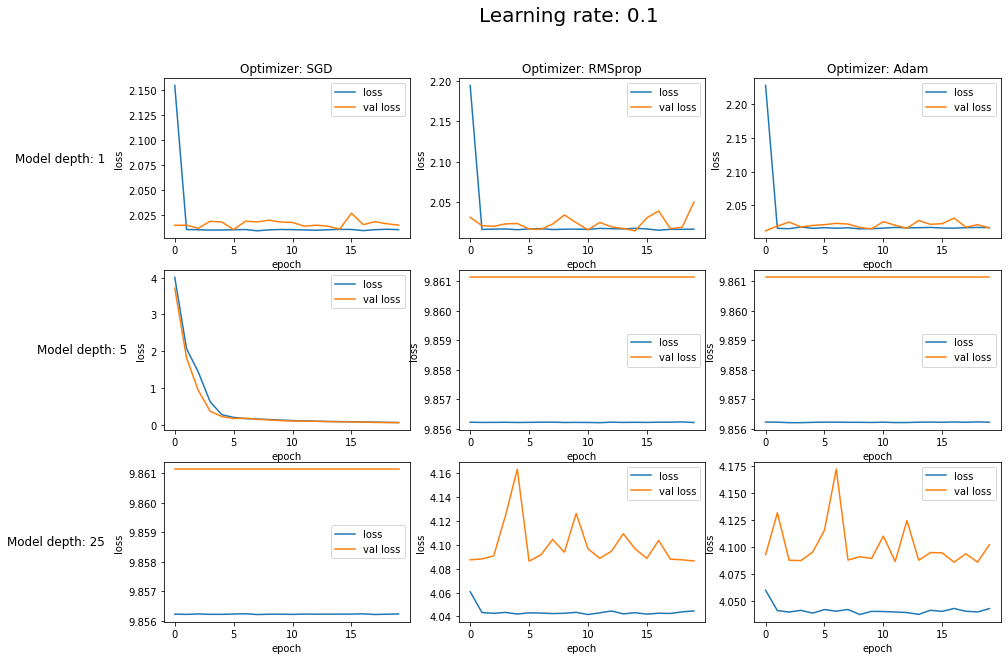

In [48]:
plot(testing_results, 0.1)

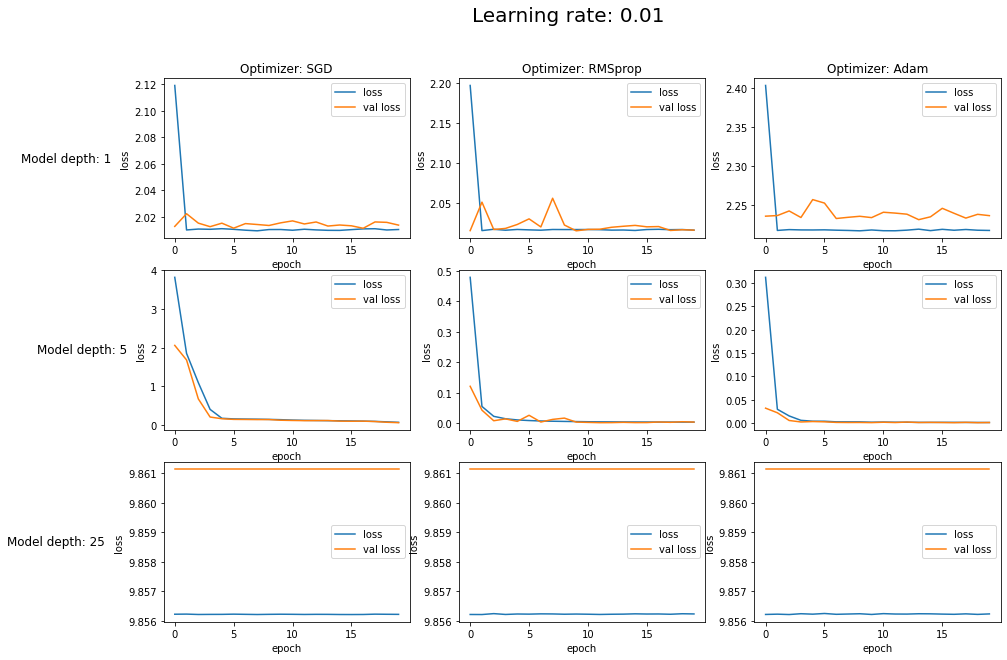

In [49]:
plot(testing_results, 0.01)

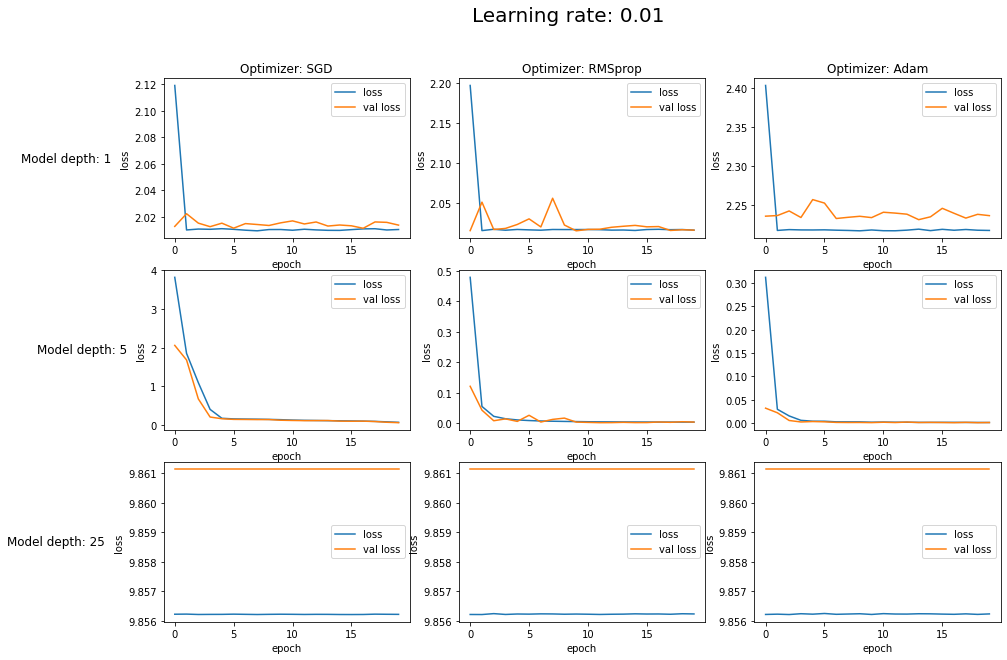

In [50]:
plot(testing_results, 0.01)